#### Individual Class Project

## Predicting Major League Baseball Game Outcomes
***

## Executive Summary:

#### Overview:


#### Project Goals:


#### Outline of Process: 

- The plan for this project is to do the following:
    - Acquire data from baseball-reference.com.
    - Prepare data by dropping columns, renaming columns, handling null values and creating new columns.
    - Explore data by visualizing data and running hypothesis tests on key features.
    - Create machine learning models to predict wins.
    - Test best performing model on out of sample data to evaluate performance

#### Conclusion & Key Findings:


#### Recommendations & Next Steps:

***

## Acquire 

In this section we will acquire the Major League Baseball data using `acquire.py` file.

- All data is acquired from batting game logs for all 30 Major League Baseball teams for the year 2021
- All batting logs were combined into one .csv file
- Data source is baseball-reference.com

#### Read data from local .csv into a dataframe to use for exploration and modeling

In [1]:
#Disable warnings
import warnings
warnings.filterwarnings('ignore')

#Import libraries 
import pandas as pd
import numpy as np

# import models
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import sklearn.feature_selection as feat_select
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder, normalize

# supress scientific notation
np.set_printoptions(suppress=True)

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#Import custom libraries
import acquire
import prepare
import explore

#Import libraries for graphing
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
df = acquire.get_batting_log_data()
df.head()

,Team,Rk,Gtm,Date,Unnamed: 4,Opp,Rslt,PA,AB,R,...,SB,CS,BA,OBP,SLG,OPS,LOB,#,Thr,Opp. Starter (GmeSc)
0,Houston Astros,1,1,1-Apr,@,OAK,"W,8-1",43,33,8,...,0,0,0.273,0.395,0.545,0.941,8,11,R,C.Bassitt(49)
1,Houston Astros,2,2,2-Apr,@,OAK,"W,9-5",45,40,9,...,0,0,0.315,0.409,0.575,0.984,9,9,L,J.Luzardo(38)
2,Houston Astros,3,3,3-Apr,@,OAK,"W,9-1",43,38,9,...,0,0,0.324,0.405,0.550,0.954,7,10,L,C.Irvin(34)
3,Houston Astros,4,4,4-Apr,@,OAK,"W,9-2",40,36,9,...,0,1,0.320,0.398,0.565,0.962,4,10,L,S.Manaea(33)
4,Houston Astros,5,5,5-Apr,@,LAA,"L,6-7",44,39,6,...,0,0,0.312,0.391,0.527,0.918,11,11,L,J.Quintana(36)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4858 entries, 0 to 4857
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Team                  4858 non-null   object 
 1   Rk                    4858 non-null   int64  
 2   Gtm                   4858 non-null   int64  
 3   Date                  4858 non-null   object 
 4   Unnamed: 4            2429 non-null   object 
 5   Opp                   4858 non-null   object 
 6   Rslt                  4858 non-null   object 
 7   PA                    4858 non-null   int64  
 8   AB                    4858 non-null   int64  
 9   R                     4858 non-null   int64  
 10  H                     4858 non-null   int64  
 11  2B                    4858 non-null   int64  
 12  3B                    4858 non-null   int64  
 13  HR                    4858 non-null   int64  
 14  RBI                   4858 non-null   int64  
 15  BB                   

- Acquired 2021 MLB baseball hitting data successfully.

*** 

## Prepare

 In this section we will clean and prepare data the obtained to use for exploration and modeling using the function in `prepare.py` file.

In [4]:
df = prepare.prepare_data()
df.head()

,Team,Date,Opp,Rslt,plate_app,at_bats,runs_scored,hits,doubles,triples,...,OBP,SLG,OPS,left_on_base,num_players_used,handedness_opp_pitcher,Opp. Starter (GmeSc),is_away,is_win,made_playoffs
0,Houston Astros,1-Apr,OAK,"W,8-1",43,33,8,9,3,0,...,0.395,0.545,0.941,8,11,R,C.Bassitt(49),1,1,1
1,Houston Astros,2-Apr,OAK,"W,9-5",45,40,9,14,4,0,...,0.409,0.575,0.984,9,9,L,J.Luzardo(38),1,1,1
2,Houston Astros,3-Apr,OAK,"W,9-1",43,38,9,13,3,0,...,0.405,0.550,0.954,7,10,L,C.Irvin(34),1,1,1
3,Houston Astros,4-Apr,OAK,"W,9-2",40,36,9,11,2,0,...,0.398,0.565,0.962,4,10,L,S.Manaea(33),1,1,1
4,Houston Astros,5-Apr,LAA,"L,6-7",44,39,6,11,1,0,...,0.391,0.527,0.918,11,11,L,J.Quintana(36),1,0,1


In [5]:
df.tail()

,Team,Date,Opp,Rslt,plate_app,at_bats,runs_scored,hits,doubles,triples,...,OBP,SLG,OPS,left_on_base,num_players_used,handedness_opp_pitcher,Opp. Starter (GmeSc),is_away,is_win,made_playoffs
4853,St. Louis Cardinals,29-Sep,MIL,"L,0-4",33,28,0,3,1,0,...,0.313,0.411,0.724,6,13,R,A.Houser(60),0,0,1
4854,St. Louis Cardinals,30-Sep,MIL,"W,4-3",30,27,4,5,1,0,...,0.313,0.411,0.724,2,14,L,B.Anderson(54),0,1,1
4855,St. Louis Cardinals,1-Oct,CHC,"W,4-3",38,34,4,9,1,0,...,0.313,0.411,0.724,8,17,R,C.Abbott(53),0,1,1
4856,St. Louis Cardinals,2-Oct,CHC,"L,5-6",39,34,5,8,2,1,...,0.313,0.412,0.725,7,15,R,A.Sampson(57),0,0,1
4857,St. Louis Cardinals,3-Oct,CHC,"L,2-3",29,24,2,6,0,0,...,0.313,0.412,0.725,6,16,R,A.Mills(45),0,0,1


***
## Explore

#### Questions to Consider Before Exploration:

- What features are most correlated to winning?
- What features rank highest amongst the most winning teams?
- Does being away from the team's home stadium affect wins?
- Does the number of walks correlate to winning?
- Does the either singles, doubles, or triples affect winning?
- Does clustering features better predict a win?
- Can we create a model to predict wins based on baseball hitting data?


Now that we have acquired and prepared the baseball data, we will begin to explore it.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4858 entries, 0 to 4857
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Team                    4858 non-null   object 
 1   Date                    4858 non-null   object 
 2   Opp                     4858 non-null   object 
 3   Rslt                    4858 non-null   object 
 4   plate_app               4858 non-null   int64  
 5   at_bats                 4858 non-null   int64  
 6   runs_scored             4858 non-null   int64  
 7   hits                    4858 non-null   int64  
 8   doubles                 4858 non-null   int64  
 9   triples                 4858 non-null   int64  
 10  HR                      4858 non-null   int64  
 11  RBI                     4858 non-null   int64  
 12  bases_on_balls          4858 non-null   int64  
 13  intentional_bb          4858 non-null   int64  
 14  strikeouts              4858 non-null   

 - Take a look at the values in the dataframe 

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
plate_app,4858.0,37.426513,4.970414,21.000,34.000,37.000,40.000,63.000
at_bats,4858.0,33.334911,4.051859,17.000,31.000,33.000,36.000,57.000
runs_scored,4858.0,4.530671,3.184529,0.000,2.000,4.000,6.000,24.000
hits,4858.0,8.127007,3.324612,0.000,6.000,8.000,10.000,22.000
doubles,4858.0,1.618567,1.340229,0.000,1.000,1.000,2.000,9.000
triples,4858.0,0.137917,0.375708,0.000,0.000,0.000,0.000,2.000
HR,4858.0,1.223549,1.182470,0.000,0.000,1.000,2.000,8.000
RBI,4858.0,4.321326,3.103705,0.000,2.000,4.000,6.000,23.000
bases_on_balls,4858.0,3.251132,2.059723,0.000,2.000,3.000,4.000,14.000
intentional_bb,4858.0,0.144710,0.439755,0.000,0.000,0.000,0.000,8.000


In [8]:
df.head()

,Team,Date,Opp,Rslt,plate_app,at_bats,runs_scored,hits,doubles,triples,...,OBP,SLG,OPS,left_on_base,num_players_used,handedness_opp_pitcher,Opp. Starter (GmeSc),is_away,is_win,made_playoffs
0,Houston Astros,1-Apr,OAK,"W,8-1",43,33,8,9,3,0,...,0.395,0.545,0.941,8,11,R,C.Bassitt(49),1,1,1
1,Houston Astros,2-Apr,OAK,"W,9-5",45,40,9,14,4,0,...,0.409,0.575,0.984,9,9,L,J.Luzardo(38),1,1,1
2,Houston Astros,3-Apr,OAK,"W,9-1",43,38,9,13,3,0,...,0.405,0.550,0.954,7,10,L,C.Irvin(34),1,1,1
3,Houston Astros,4-Apr,OAK,"W,9-2",40,36,9,11,2,0,...,0.398,0.565,0.962,4,10,L,S.Manaea(33),1,1,1
4,Houston Astros,5-Apr,LAA,"L,6-7",44,39,6,11,1,0,...,0.391,0.527,0.918,11,11,L,J.Quintana(36),1,0,1


#### Univariate Exploration

In [9]:
#Take a look at the target variable 
df.is_win.sum()

2429

Half of the teams won and half lost, as is the case when two teams play against each other.  

<AxesSubplot:>

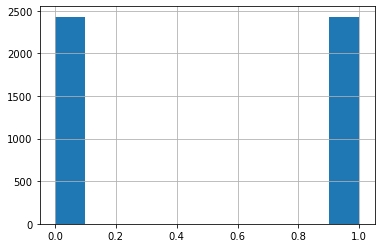

In [10]:
df.is_win.hist()

Text(0.5, 1.0, 'Histogram of Runs Scored')

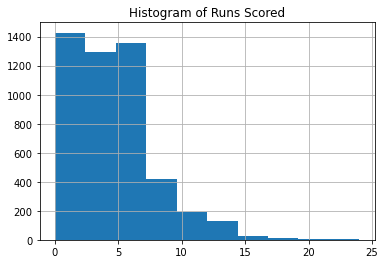

In [11]:
df.runs_scored.hist()
plt.title("Histogram of Runs Scored")

In [12]:
df.runs_scored.value_counts()

3     687
2     642
4     608
5     560
1     486
6     443
7     356
0     299
8     262
9     155
10    109
11     84
12     59
13     39
14     29
15     17
17      7
16      6
18      3
20      3
22      2
24      1
19      1
Name: runs_scored, dtype: int64

It looks like majority of games had less than 5 runs scored

Text(0.5, 1.0, 'Histogram of At Bats')

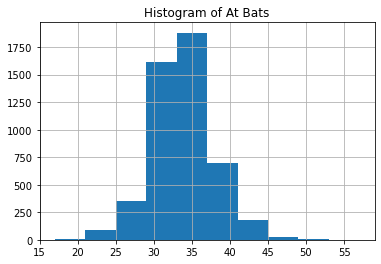

In [13]:
df.at_bats.hist()
plt.title("Histogram of At Bats")

In [14]:
df.at_bats.value_counts(), df.at_bats.min(), df.at_bats.max()

(33    571
 34    528
 32    502
 31    462
 35    419
 30    411
 36    363
 37    257
 29    238
 38    200
 28    164
 39    143
 27    105
 40     97
 41     74
 43     50
 26     49
 42     39
 24     37
 25     32
 23     28
 44     21
 45     16
 22     12
 21     10
 47      5
 46      5
 20      5
 50      4
 49      3
 48      2
 53      1
 18      1
 57      1
 17      1
 52      1
 51      1
 Name: at_bats, dtype: int64,
 17,
 57)

Most games had between 30-39 player at bats.

Text(0.5, 1.0, 'Histogram of Hits')

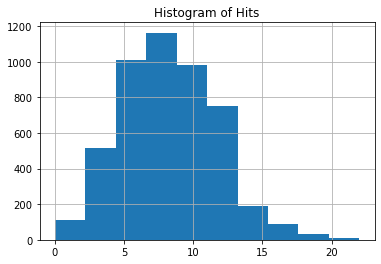

In [15]:
df.hits.hist()
plt.title("Histogram of Hits")

In [16]:
df.hits.value_counts()

8     588
7     575
6     550
9     537
5     459
10    446
11    353
4     333
12    246
3     184
13    154
14    106
2      84
15     83
16     60
17     29
18     23
1      19
0      11
19      8
20      5
22      3
21      2
Name: hits, dtype: int64

In [17]:
df.hits.mean()

8.127006998764925

Most games had about 8 hits.

Text(0.5, 1.0, 'Histogram of Doubles ')

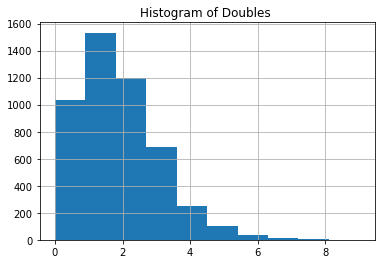

In [18]:
df.doubles.hist()
plt.title("Histogram of Doubles ")

In [19]:
df.doubles.value_counts()

1    1532
2    1197
0    1034
3     684
4     253
5     100
6      39
7      14
8       4
9       1
Name: doubles, dtype: int64

Most games had either one or two doubles.

Text(0.5, 1.0, 'Histogram of Triples Scored')

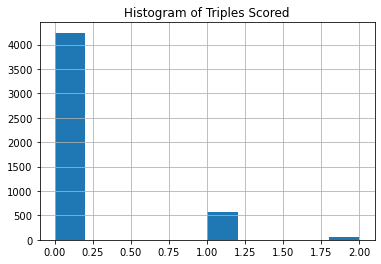

In [20]:
df.triples.hist()
plt.title("Histogram of Triples Scored")

In [21]:
df.triples.value_counts()

0    4242
1     562
2      54
Name: triples, dtype: int64

Most games did not have a triple in the game.

Text(0.5, 1.0, 'Histogram of Homeruns')

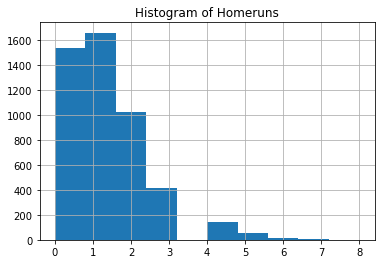

In [22]:
df.HR.hist()
plt.title("Histogram of Homeruns")

In [23]:
df.HR.value_counts()

1    1662
0    1536
2    1026
3     414
4     142
5      56
6      16
7       4
8       2
Name: HR, dtype: int64

About a third of the games had one homerun. Very few games had more than 5 homeruns.  

Text(0.5, 1.0, 'Histogram of Runs Batted In')

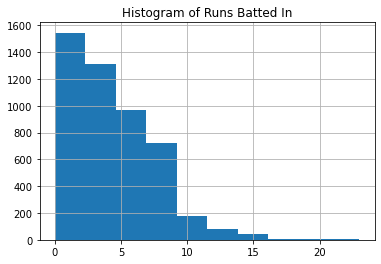

In [24]:
df.RBI.hist()
plt.title("Histogram of Runs Batted In")

In [25]:
df.RBI.value_counts()

3     702
2     682
4     606
5     564
1     535
6     407
7     354
0     327
8     222
9     142
10    106
11     72
12     42
13     37
14     29
15     11
17      7
16      5
20      3
18      2
22      2
23      1
Name: RBI, dtype: int64

Most games have between 1-5 runs batted in per game.

Text(0.5, 1.0, 'Histogram of Batting Average')

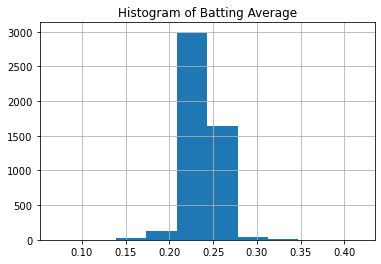

In [26]:
df.batting_avg.hist()
plt.title("Histogram of Batting Average")

Most teams have a batting average between 0.2 and 0.25

<AxesSubplot:>

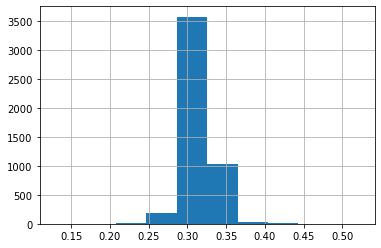

In [27]:
df.OBP.hist()

In [28]:
df.OBP.value_counts()

0.316    185
0.317    161
0.315    161
0.318    156
0.303    151
        ... 
0.430      1
0.447      1
0.240      1
0.231      1
0.271      1
Name: OBP, Length: 161, dtype: int64

Most teams have an On Base Percentage of about 0.30

<AxesSubplot:>

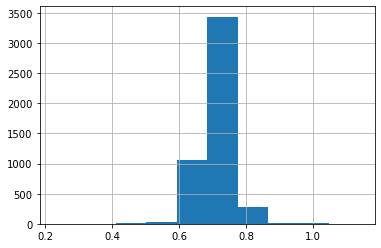

In [29]:
df.OPS.hist()

Most team have an On Base + Slugging Percentage of about 0.7.

<AxesSubplot:>

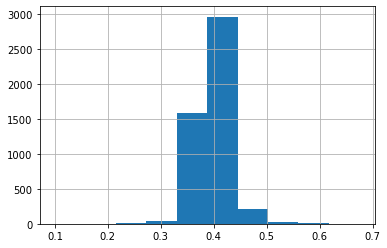

In [30]:
df.SLG.hist()

Most teams have a Slugging Percentage (Total bases / At Bats) of about 0.4

<AxesSubplot:>

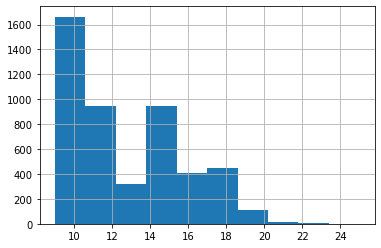

In [31]:
df.num_players_used.hist()

Most games used about 10 players

In [32]:
df.is_away.sum()

2429

Half of the games were away.  This is expected as one team is away and one is home when two teams play against each other.

<AxesSubplot:>

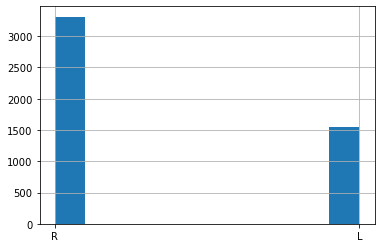

In [33]:
df.handedness_opp_pitcher.hist()

Most teams have right-handed pitchers.

<AxesSubplot:>

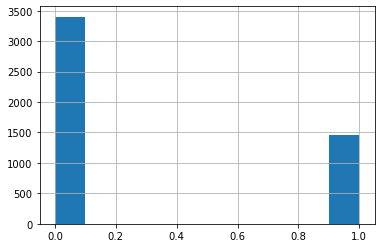

In [34]:
df.made_playoffs.hist()

## Split Data into Train, Validate, and Test Sets
#### Before exploring relationships between two or more variables, we will split the data into train, validate, and test sets.

In [35]:
train, validate, test = prepare.train_validate_test_split(df, 'is_win', seed=123)
train.shape, validate.shape, test.shape

((2720, 33), (1166, 33), (972, 33))

#### Bivariate Exploration

In [36]:
df.columns

Index(['Team', 'Date', 'Opp', 'Rslt', 'plate_app', 'at_bats', 'runs_scored',
       'hits', 'doubles', 'triples', 'HR', 'RBI', 'bases_on_balls',
       'intentional_bb', 'strikeouts', 'hit_by_pitch', 'sac_hits', 'sac_flies',
       'reached_on_error', 'double_plays', 'stolen_bases', 'caught_stealing',
       'batting_avg', 'OBP', 'SLG', 'OPS', 'left_on_base', 'num_players_used',
       'handedness_opp_pitcher', 'Opp. Starter (GmeSc)', 'is_away', 'is_win',
       'made_playoffs'],
      dtype='object')

In [37]:
cat_vars = ['Team', 'is_away', 'handedness_opp_pitcher','made_playoffs']
quant_vars = [
       'hits', 'doubles', 'triples', 'HR', 'RBI', 'bases_on_balls']

In [38]:
cat_vars = cat_vars[1:]

In [39]:
#explore.explore_bivariate(train, 'is_win', cat_vars, quant_vars)

runs_scored 
____________________



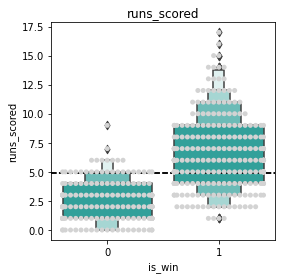

        count      mean       std  min  25%  50%  75%   max
is_win                                                     
0       172.0  2.505814  1.768791  0.0  1.0  2.0  4.0   9.0
1       233.0  6.609442  3.221332  1.0  4.0  6.0  9.0  17.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=5013.5, pvalue=1.872168915421428e-38)

____________________



In [40]:
playoff_away_subset = train[(train.is_away==1) & (train.made_playoffs==1)]

explore.explore_bivariate_quant(playoff_away_subset, 'is_win', 'runs_scored')

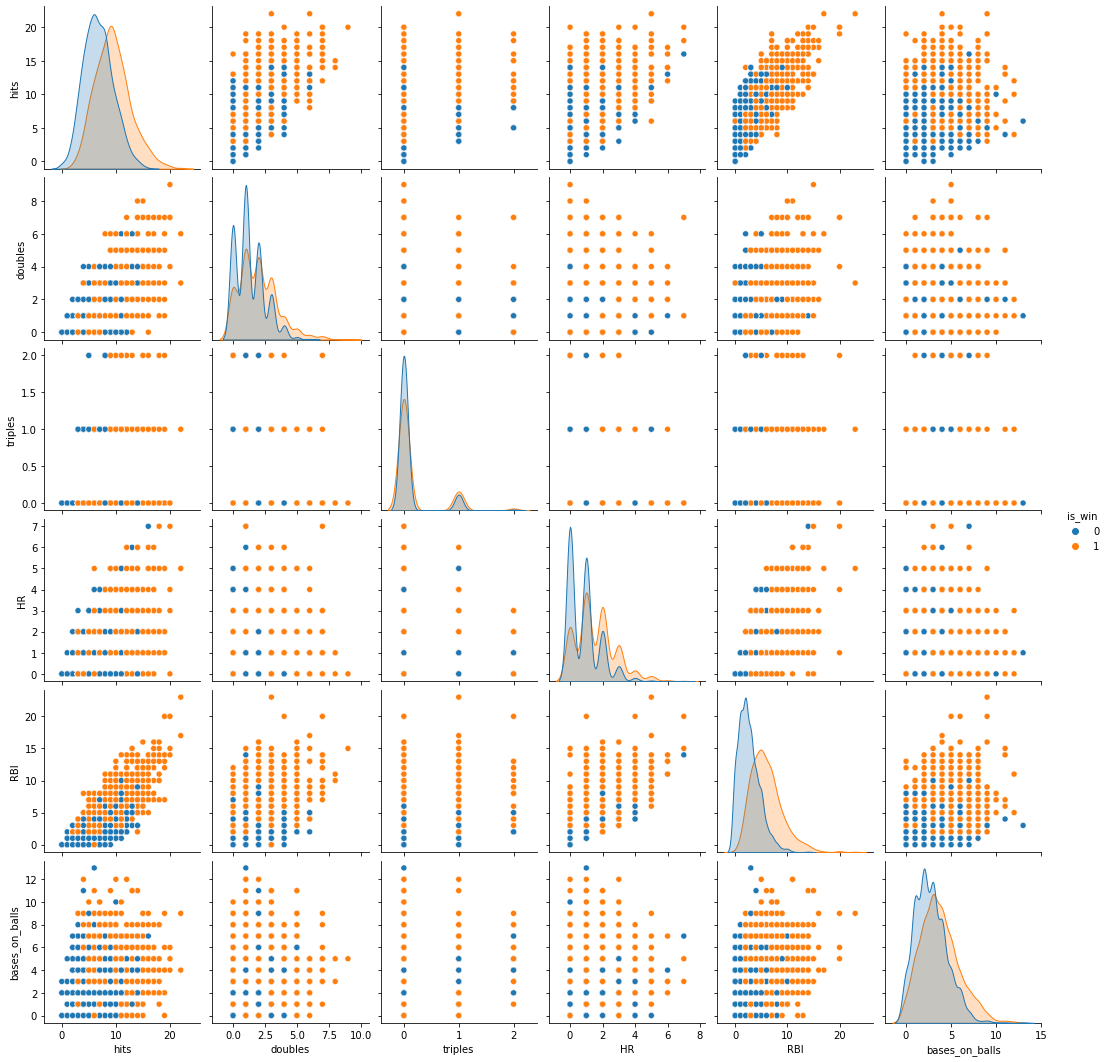

In [41]:
pair = sns.pairplot(data=train, vars=quant_vars, hue="is_win")
plt.show()

In [42]:
target = 'is_win'

# explore.explore_multivariate(train, target, cat_vars, quant_vars)

In [43]:
#Let's look at how variables are correlated
corr =  train.corr(method='spearman')

<AxesSubplot:>

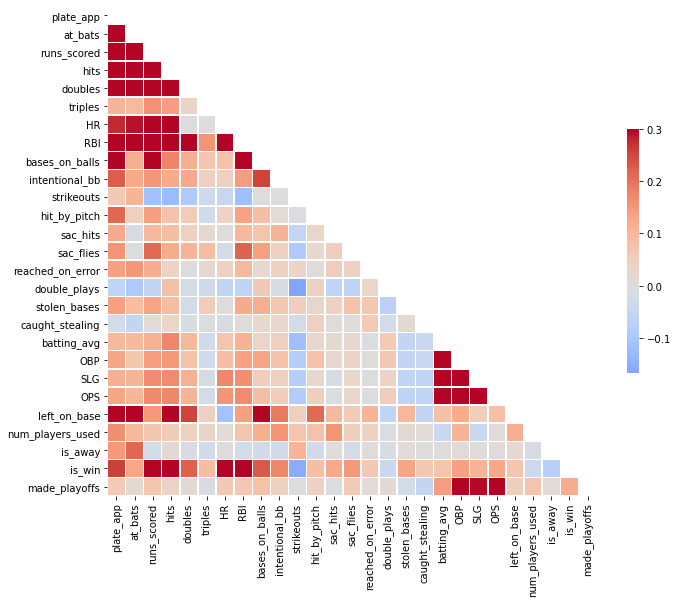

In [44]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

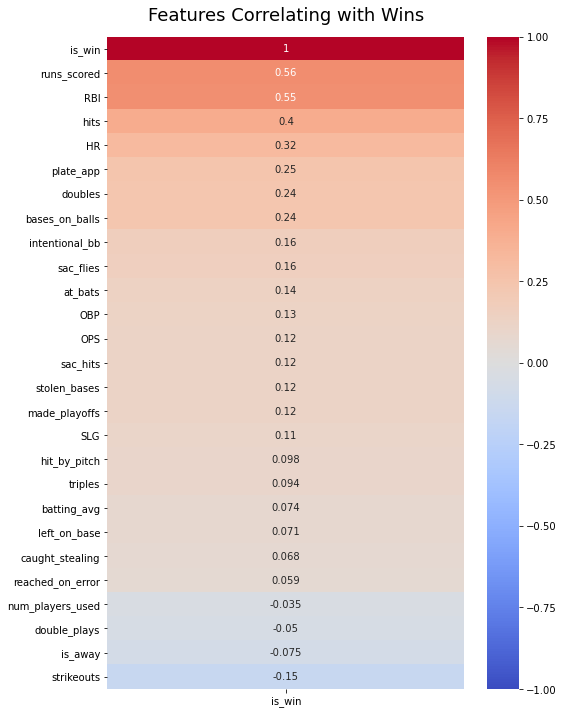

In [45]:
#see what correlates most with wins with heatmap
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr()[['is_win']].sort_values(by='is_win', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Features Correlating with Wins', fontdict={'fontsize':18}, pad=16);

In [46]:
#Look at the correlation with log error
corr_log = train.corrwith(train["is_win"])
corr_log.max

<bound method NDFrame._add_numeric_operations.<locals>.max of plate_app           0.247766
at_bats             0.135502
runs_scored         0.559842
hits                0.403573
doubles             0.238791
triples             0.093777
HR                  0.315634
RBI                 0.548929
bases_on_balls      0.236138
intentional_bb      0.164491
strikeouts         -0.153668
hit_by_pitch        0.098022
sac_hits            0.123387
sac_flies           0.156534
reached_on_error    0.059303
double_plays       -0.049696
stolen_bases        0.121713
caught_stealing     0.068003
batting_avg         0.073702
OBP                 0.129398
SLG                 0.107870
OPS                 0.124892
left_on_base        0.071496
num_players_used   -0.035311
is_away            -0.075002
is_win              1.000000
made_playoffs       0.119417
dtype: float64>

In [47]:
print(corr_log.sort_values(ascending=False))

is_win              1.000000
runs_scored         0.559842
RBI                 0.548929
hits                0.403573
HR                  0.315634
plate_app           0.247766
doubles             0.238791
bases_on_balls      0.236138
intentional_bb      0.164491
sac_flies           0.156534
at_bats             0.135502
OBP                 0.129398
OPS                 0.124892
sac_hits            0.123387
stolen_bases        0.121713
made_playoffs       0.119417
SLG                 0.107870
hit_by_pitch        0.098022
triples             0.093777
batting_avg         0.073702
left_on_base        0.071496
caught_stealing     0.068003
reached_on_error    0.059303
num_players_used   -0.035311
double_plays       -0.049696
is_away            -0.075002
strikeouts         -0.153668
dtype: float64


When looking at correlation with wins, runs scored, runs batted in, number of hits, and homeruns rank highest.

### Hypothesis Testing: Statistical tests to check for independence among features

In order to create a better model, we will test for independence among baseball hitting features and winning to see if that feature should be used for our model.  We will use the correlation rankings above to guide our tests.

In [48]:
#Set our alpha
alpha = 0.05

### Question 1: Is winning related to number of runs scored?  

$H_0$ : There is no difference between number of runs scored in a winning game and the overall average.

$H_a$ : There is a difference between number of runs scored in a winning game  and the overall average.

In [49]:
null_hypothesis1 = 'winning is not related to number of runs scored'

In [50]:
winning_games = train[train.is_win == 1]

In [51]:
t, p = stats.ttest_1samp(winning_games.runs_scored, train.runs_scored.mean())

print(f't = {t:.3f}')
print(f'p = {p:.3f}')

t = 21.252
p = 0.000


In [52]:
if p < alpha:
    print("We reject the hypothesis that", null_hypothesis1)
else:
    print("We fail to reject the null hypothesis")

We reject the hypothesis that winning is not related to number of runs scored


Text(0.5, 1.0, 'Distribution of Runs Scored by All Teams')

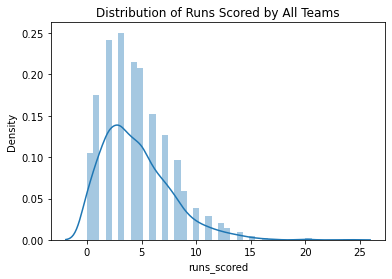

In [53]:
sns.distplot(train.runs_scored)
plt.title('Distribution of Runs Scored by All Teams')

Text(0.5, 1.0, 'Number of Runs Scored with Game Result')

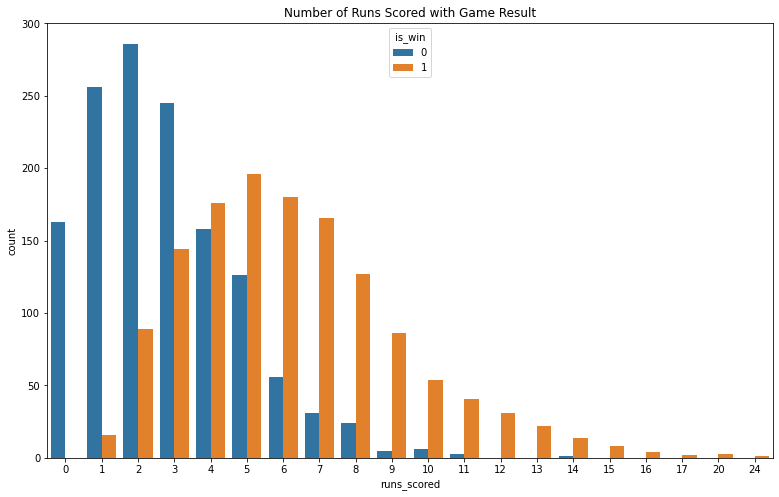

In [54]:
f, ax = plt.subplots(figsize=(13, 8))
ax = sns.countplot(x="runs_scored", hue='is_win',data=train)
plt.title ("Number of Runs Scored with Game Result")

* A higher number of runs were scored in winning games.

### Question 2: Does number of hits differ by winning teams?  

$H_0$ : There is no difference between number of hits by winning teams and the overall average.

$H_a$ : There is a difference between number of hits by winning teams and the overall average.

In [55]:
null_hypothesis2 = 'winning is not related to number of hits in a game'

In [56]:
t, p = stats.ttest_1samp(winning_games.hits, train.hits.mean())

print(f't = {t:.3f}')
print(f'p = {p:.3f}')

t = 15.001
p = 0.000


In [57]:
if p < alpha:
    print("We reject the hypothesis that", null_hypothesis2)
else:
    print("We fail to reject the null hypothesis")

We reject the hypothesis that winning is not related to number of hits in a game


Text(0.5, 1.0, 'Distribution of Hits by All Teams')

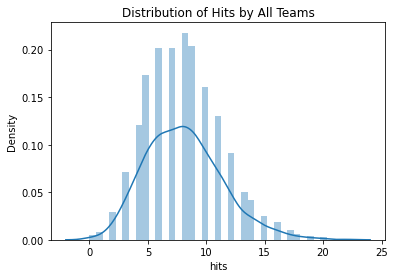

In [58]:
sns.distplot(train.hits)
plt.title('Distribution of Hits by All Teams')

Text(0.5, 1.0, 'Number of Hits in a Game with Game Result')

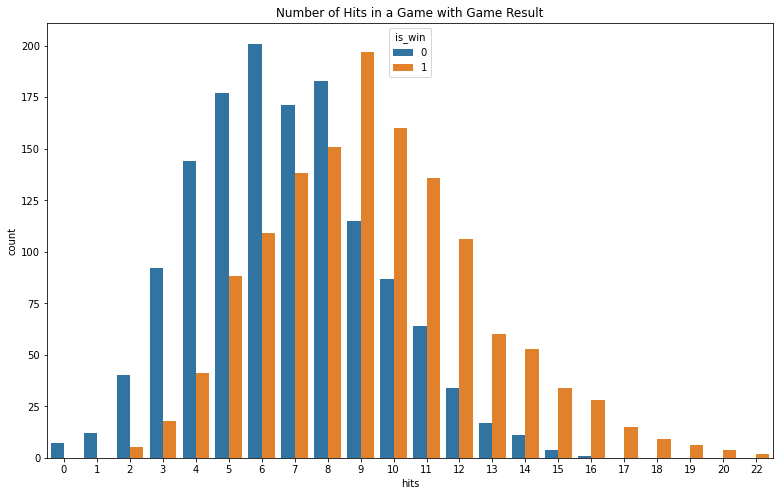

In [59]:
f, ax = plt.subplots(figsize=(13, 8))
ax = sns.countplot(x="hits", hue='is_win',data=train)
plt.title ("Number of Hits in a Game with Game Result")

- Teams that won had a higher number of hits, where teams that lost had less hits.

### Question 3: Does number of homeruns differ by winning teams?  

$H_0$ : There is no difference between number of homeruns by winning teams and the overall average.

$H_a$ : There is a difference between number of homeruns by winning teams and the overall average.

In [60]:
null_hypothesis3 = 'winning is not related to number of homeruns in a game'

In [61]:
t, p = stats.ttest_1samp(winning_games.HR, train.HR.mean())

print(f't = {t:.3f}')
print(f'p = {p:.3f}')

t = 10.970
p = 0.000


In [62]:
if p < alpha:
    print("We reject the hypothesis that", null_hypothesis3)
else:
    print("We fail to reject the null hypothesis")

We reject the hypothesis that winning is not related to number of homeruns in a game


Text(0.5, 1.0, 'Distribution of Homeruns by All Teams Per Game')

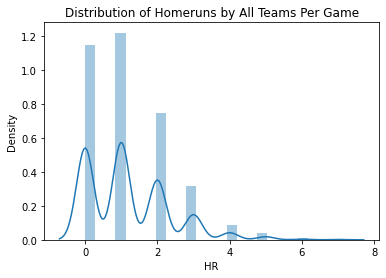

In [63]:
sns.distplot(train.HR)
plt.title('Distribution of Homeruns by All Teams Per Game')

Text(0.5, 1.0, 'Number of Homeruns By A Team in a Game with Game Result')

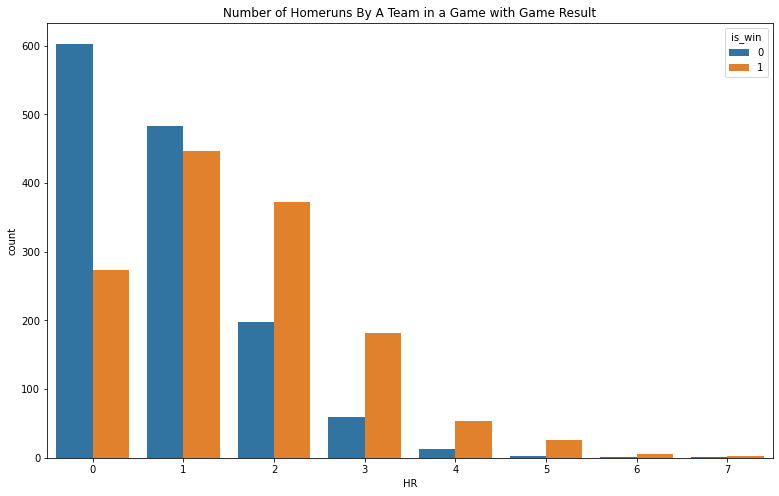

In [64]:
f, ax = plt.subplots(figsize=(13, 8))
ax = sns.countplot(x="HR", hue='is_win',data=train)
plt.title ("Number of Homeruns By A Team in a Game with Game Result")

- Teams with 2 homeruns or more usually won the game.
- Teams with 0 homeruns in a game usually lost.
- Having one homerun in a game does not mean that team will win.  
- Teams with high number of homeruns usually won.

### Question 4: Is winning related to the number of runs batted in (RBI)?  

$H_0$ : There is no difference between number of runs batted in in a winning game and the overall average.

$H_a$ : There is a difference between number of runs batted in in a winning game  and the overall average.

In [65]:
null_hypothesis4 = 'winning is not related to number of runs batted in a game'

In [66]:
t, p = stats.ttest_1samp(winning_games.RBI, train.RBI.mean())

print(f't = {t:.3f}')
print(f'p = {p:.3f}')

t = 20.700
p = 0.000


In [67]:
if p < alpha:
    print("We reject the hypothesis that", null_hypothesis4)
else:
    print("We fail to reject the null hypothesis")

We reject the hypothesis that winning is not related to number of runs batted in a game


Text(0.5, 1.0, 'Distribution of RBIs by All Teams Per Game')

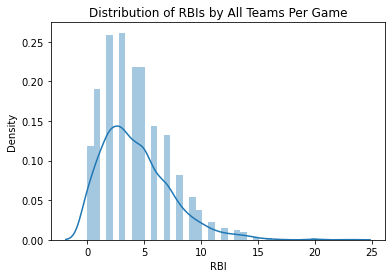

In [68]:
sns.distplot(train.RBI)
plt.title('Distribution of RBIs by All Teams Per Game')

Text(0.5, 1.0, 'Number of RBIs By A Team in a Game with Game Result')

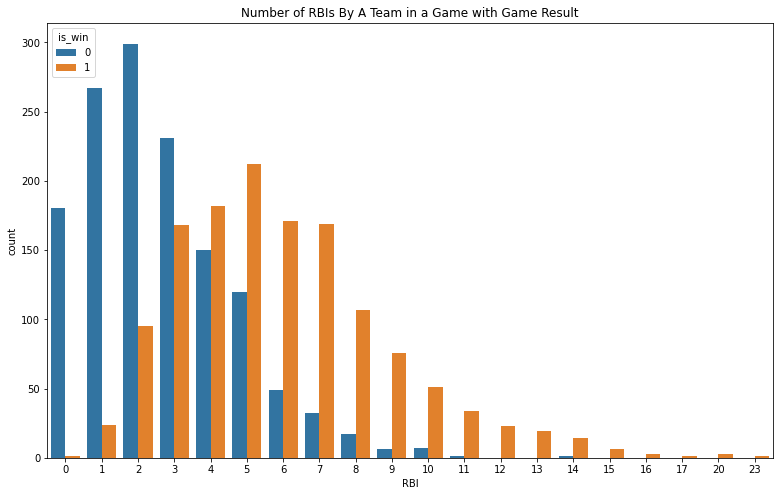

In [69]:
f, ax = plt.subplots(figsize=(13, 8))
ax = sns.countplot(x="RBI", hue='is_win',data=train)
plt.title ("Number of RBIs By A Team in a Game with Game Result")

- Teams with few runs batted in usually lost.  
- Teams are more likely to win with higher number of runs batted in.
- Teams are more likely to win if they have 4 or more runs batted in.
- Teams can still lose if they have a high number of runs batted in.

### Question 5: Is winning related to the number of total appearances at the plate by a player in the game? 

$H_0$ : There is no relationship between winning and the number of plate appearances.

$H_a$ : There is a relationship between winning and the number of plate appearances.

In [70]:
null_hypothesis5 = 'winning is not related to number of total plate appearances in a game'

In [71]:
t, p = stats.ttest_1samp(winning_games.plate_app, train.plate_app.mean())

print(f't = {t:.3f}')
print(f'p = {p:.3f}')

t = 8.803
p = 0.000


In [72]:
if p < alpha:
    print("We reject the hypothesis that", null_hypothesis5)
else:
    print("We fail to reject the null hypothesis")

We reject the hypothesis that winning is not related to number of total plate appearances in a game


Text(0.5, 1.0, 'Distribution of Plate Appearances by All Teams Per Game')

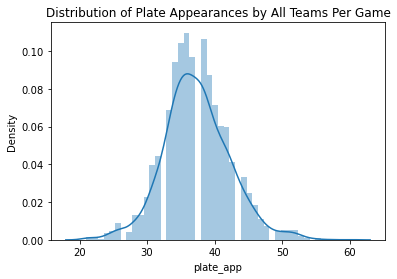

In [73]:
sns.distplot(train.plate_app)
plt.title('Distribution of Plate Appearances by All Teams Per Game')

Text(0.5, 1.0, 'Number of Plate Appearances By A Team in a Game with Game Result')

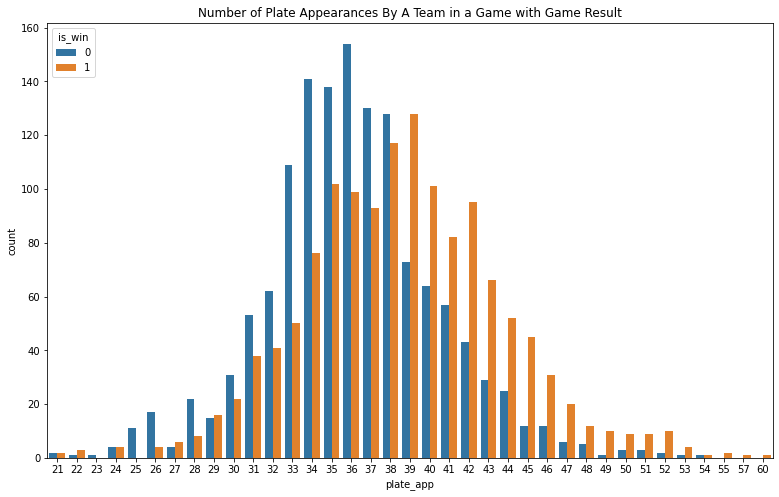

In [74]:
f, ax = plt.subplots(figsize=(13, 8))
ax = sns.countplot(x="plate_app", hue='is_win',data=train)
plt.title ("Number of Plate Appearances By A Team in a Game with Game Result")

- The higher the number of plate appearances by a team, the higher the likelihood of winning.

### Question 6: Is winning related to the number of doubles that were hit in the game?

$H_0$ : There is no relationship between winning and the number of doubles in a game.

$H_a$ : There is a relationship between winning and the number of doubles in a game.

In [75]:
null_hypothesis6 = 'winning is not related to number of doubles hit in a game'

In [76]:
t, p = stats.ttest_1samp(winning_games.doubles, train.doubles.mean())

print(f't = {t:.3f}')
print(f'p = {p:.3f}')

t = 8.007
p = 0.000


In [77]:
if p < alpha:
    print("We reject the hypothesis that", null_hypothesis6)
else:
    print("We fail to reject the null hypothesis")

We reject the hypothesis that winning is not related to number of doubles hit in a game


Text(0.5, 1.0, 'Distribution of Doubles Per Game')

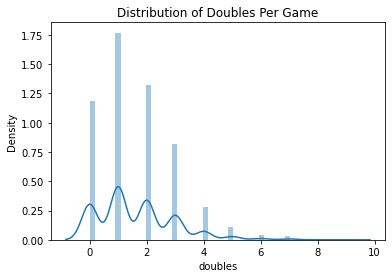

In [78]:
sns.distplot(train.doubles)
plt.title('Distribution of Doubles Per Game')

Text(0.5, 1.0, 'Number of Doubles By A Team in a Game with Game Result')

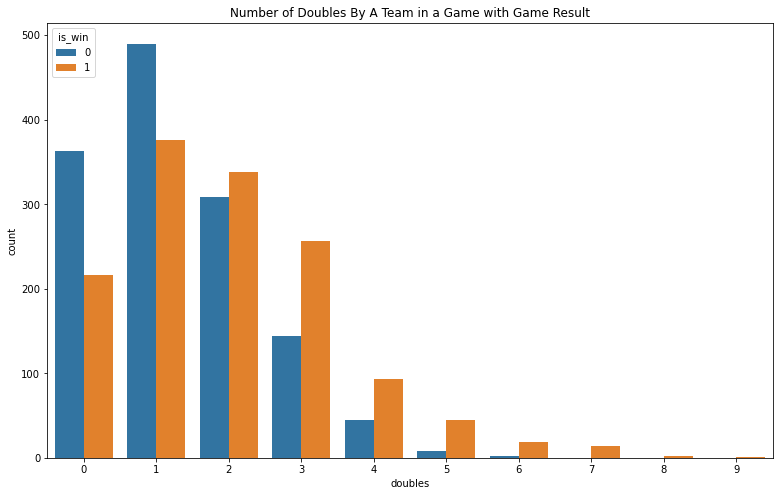

In [79]:
f, ax = plt.subplots(figsize=(13, 8))
ax = sns.countplot(x="doubles", hue='is_win',data=train)
plt.title ("Number of Doubles By A Team in a Game with Game Result")

- Teams with 2 or more doubles per game are more likely to win

### Question 7: Is winning related to the number of bases that were obtained by being walked by the pitcher? 

$H_0$ : There is no relationship between winning and the number of walks in a game.

$H_a$ : There is a relationship between winning and the number of walks in a game.

In [80]:
null_hypothesis7 = 'winning is not related to number of walks in a game'

In [81]:
t, p = stats.ttest_1samp(winning_games.bases_on_balls, train.bases_on_balls.mean())

print(f't = {t:.3f}')
print(f'p = {p:.3f}')

t = 8.215
p = 0.000


In [82]:
if p < alpha:
    print("We reject the hypothesis that", null_hypothesis7)
else:
    print("We fail to reject the null hypothesis")

We reject the hypothesis that winning is not related to number of walks in a game


Text(0.5, 1.0, 'Distribution of Walks Per Game')

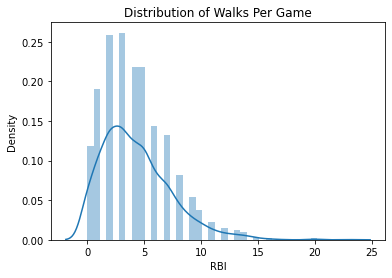

In [83]:
sns.distplot(train.RBI)
plt.title('Distribution of Walks Per Game')

Text(0.5, 1.0, 'Number of Bases Obtained By Being Walked in a Game with Game Result')

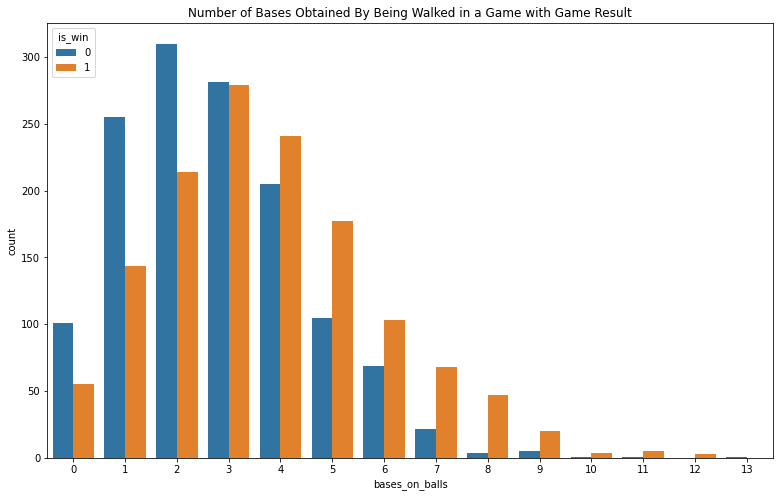

In [84]:
f, ax = plt.subplots(figsize=(13, 8))
ax = sns.countplot(x="bases_on_balls", hue='is_win',data=train)
plt.title ("Number of Bases Obtained By Being Walked in a Game with Game Result")

- Teams with 4 or more bases on balls are more likely to win. 
- Teams with 3 or less walks are less likely to win.

### Question 8: Is winning related to whether the team is playing away?  

$H_0$ : There is no relationship between winning and a team playing away.

$H_a$ : There is a relationship between winning and a team playing away.

#### Looking at the two following variables: is_win (discrete/categorical) and is_away (discrete/categorical)

 Since they are 2 discrete/categorical variables,  we will be using $\chi^2$ testing

In [85]:
null_hypothesis8 = "winning is independent of whether a team is playing away"

In [86]:
observed = pd.crosstab(train.is_win, train.is_away)
observed

is_away,0,1
is_win,,
0,634,726
1,736,624


In [87]:
# use stats.chi2_contingency test 
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [88]:
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

chi^2 = 15.0023
p     = 0.0001


In [89]:
if p < alpha:
    print("We reject the hypothesis that", null_hypothesis8)
else:
    print("We fail to reject the null hypothesis")

We reject the hypothesis that winning is independent of whether a team is playing away


Text(0.5, 1.0, 'Percentage of Game Results\n Depending on Where Teams Play')

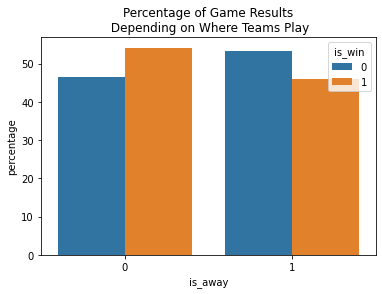

In [90]:
away_pct= (train.groupby(['is_win'])['is_away']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('is_away'))
p = sns.barplot(x="is_away", y="percentage", hue="is_win", data=away_pct)
plt.title("Percentage of Game Results\n Depending on Where Teams Play")

- Teams are more likely to lose when they play away
- Teams have a higher percentage of winning when they play at their home baseball stadium.
***

# Modeling and Evaluation
 After confirming that all features are correlated to winning, we can now create our models to see which performs best on training data.  
The plan to create and evaluate our models is the following:

- Train (fit, transform, evaluate) multiple models, varying the algorithm and/or hyperparameters used
- Establish a baseline accuracy to determine if having a model is better than no model and train and compare at least 3 different models.
- Compare evaluation metrics across all the models you train and select the ones you want to evaluate using the validate dataframe.
- Choose the best model based on the evaluation of your models using the train and validate datasets,
- Test the final model on your out-of-sample data (the testing dataset), summarize the performance, interpret and document results.

### Split the data along the target variable to prepare for use in models¶


In [91]:
df.columns

Index(['Team', 'Date', 'Opp', 'Rslt', 'plate_app', 'at_bats', 'runs_scored',
       'hits', 'doubles', 'triples', 'HR', 'RBI', 'bases_on_balls',
       'intentional_bb', 'strikeouts', 'hit_by_pitch', 'sac_hits', 'sac_flies',
       'reached_on_error', 'double_plays', 'stolen_bases', 'caught_stealing',
       'batting_avg', 'OBP', 'SLG', 'OPS', 'left_on_base', 'num_players_used',
       'handedness_opp_pitcher', 'Opp. Starter (GmeSc)', 'is_away', 'is_win',
       'made_playoffs'],
      dtype='object')

In [92]:
# create X & y version of train, where y is a series with just the target variable and X are the selected features. 

X_train = train[['runs_scored','RBI', 'hits', 'HR','plate_app', 'doubles','bases_on_balls']]
y_train = train.is_win

X_validate = validate[['runs_scored', 'RBI', 'hits', 'HR','plate_app', 'doubles','bases_on_balls']]
y_validate = validate.is_win

X_test = test[['runs_scored', 'RBI', 'hits', 'HR','plate_app', 'doubles','bases_on_balls']]
y_test = test.is_win

In [93]:
X_train.shape, X_validate.shape, X_test.shape

((2720, 7), (1166, 7), (972, 7))

### Setup the baseline

The most frequently observed outcome will be our baseline

In [94]:
train.is_win.value_counts()

0    1360
1    1360
Name: is_win, dtype: int64

- Since both probabilities of winning or losing are the same, it does not matter which outcome to choose as our baseline because it is the same.
- Will choose 0, or lose, for our baseline outcome to run our model against.

In [95]:
baseline = 0

In [96]:
# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_pred = y_train == 0

baseline_accuracy = matches_baseline_pred.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.5


### Decision Tree Model

In [97]:
# For a first run at it, let's create the Decision Tree object with max_depth of 3.
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [98]:
#Fit the random forest model to the training data.
clf = clf.fit(X_train, y_train)

In [99]:
#Use the model to get accuracy on training dataset
print('Accuracy of Decision Tree model on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree model on training set: 0.77


In [100]:
# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = clf.predict(X_train)

In [101]:
# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of 3 depth")
pd.DataFrame(report)

Tree of 3 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.740277,0.802993,0.768015,0.771635,0.771635
recall,0.825735,0.710294,0.768015,0.768015,0.768015
f1-score,0.780674,0.753804,0.768015,0.767239,0.767239
support,1360.000000,1360.000000,0.768015,2720.000000,2720.000000


In [102]:
#To compare several train and validate data sets, let's run through a range of max_depth values
metrics = []

for i in range(2, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # Evaluate the model's performance on train 
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
dm = pd.DataFrame(metrics)
dm["difference"] = dm.train_accuracy - dm.validate_accuracy
dm

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.757721,0.744425,0.013295
1,3,0.768015,0.772727,-0.004713
2,4,0.781618,0.768439,0.013179
3,5,0.788235,0.771012,0.017223
4,6,0.808088,0.767581,0.040507
5,7,0.825735,0.764151,0.061584
6,8,0.840809,0.770154,0.070654
7,9,0.859191,0.769297,0.089894
8,10,0.882353,0.747856,0.134497
9,11,0.901838,0.756432,0.145406


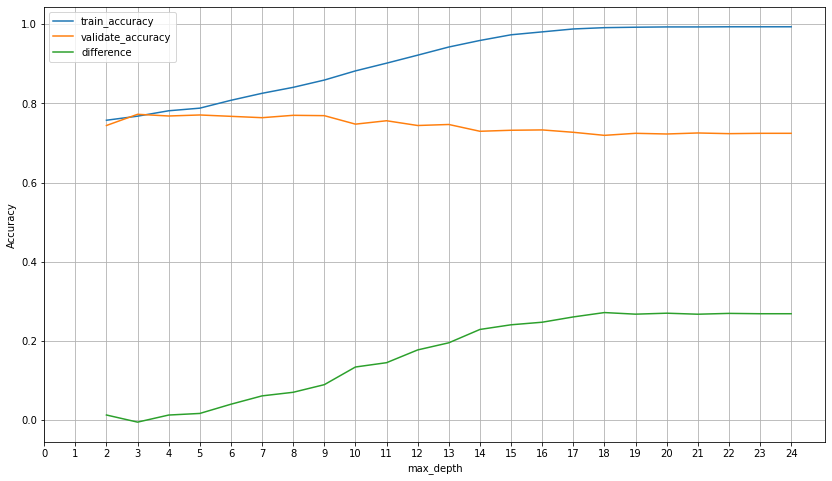

In [103]:
# plot the data
dm.set_index('max_depth').plot(figsize = (14,8))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,25,1))
plt.grid()

In [104]:
# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.83      0.78       583
           1       0.80      0.72      0.76       583

    accuracy                           0.77      1166
   macro avg       0.78      0.77      0.77      1166
weighted avg       0.78      0.77      0.77      1166



#### Decision Tree Model Takeaways:

- Best Decision Tree Model has an accuracy of 0.99 using the train set using max_depth=18 but is very overfit compared to validate's 0.72 accuracy
- Will choose Decision Tree Model with the accuracy of 0.768 using the train set is not overfit with a 0.773 using max_depth=3 and it performed better on validate than on test
- Both are higher than the baseline accuracy of 0.5

### Random Forest Model
Let's try another machine learning algorithm to compare performance.


In [105]:
# Make the model
forest1 = RandomForestClassifier(max_depth=5, random_state=123)

# Fit the model (on train and only train)
tree1 = forest1.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = forest1.predict(X_train)

# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of 5 depth")
pd.DataFrame(report)

Tree of 5 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.806529,0.762978,0.783088,0.784753,0.784753
recall,0.744853,0.821324,0.783088,0.783088,0.783088
f1-score,0.774465,0.791076,0.783088,0.782771,0.782771
support,1360.000000,1360.000000,0.783088,2720.000000,2720.000000


In [106]:
# Looking at a range of max_depths, let's compare in-sample to out-of-sample again using Random Forest 
metrics = []

for i in range(2, 25):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
dm = pd.DataFrame(metrics)
dm["difference"] = dm.train_accuracy - dm.validate_accuracy
dm

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.755515,0.751286,0.004228
1,3,0.759559,0.753859,0.005699
2,4,0.765809,0.759863,0.005946
3,5,0.783088,0.767581,0.015507
4,6,0.807353,0.786449,0.020904
5,7,0.827206,0.788165,0.039041
6,8,0.847059,0.796741,0.050318
7,9,0.869485,0.789880,0.079605
8,10,0.891544,0.791595,0.099949
9,11,0.915809,0.791595,0.124214


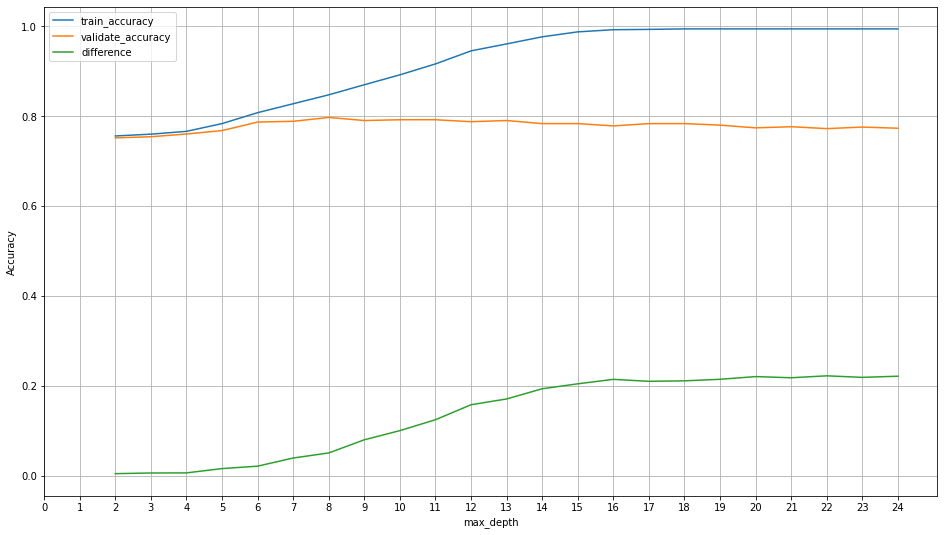

In [107]:
# plot the data
dm.set_index('max_depth').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,25,1))
plt.grid()

#### Random Forest Model Takeaways:
- Best Random Forest Model has an accuracy of 0.993 onthe train data set but is very overfit comparing to 0.783 on the validate data set
- Choosing Random Forest Model with an accuracy of 0.847 on the train data set which is not overfit comparing to 0.797 on the validate data set using max_depth = 8 
- Both are higher than the baseline accuracy of 0.5

### K-Nearest Neighbors Model

Trying another algorithm for our machine learning model to compare performance

In [108]:
metrics = []

# loop through different values of k
for k in range(1, 25):
            
    # define the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the thing (remember only fit on training data)
    knn.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = knn.score(X_train, y_train)
    validate_accuracy = knn.score(X_validate, y_validate)
    
    output = {
        "k": k,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
results = pd.DataFrame(metrics)
    
results["difference"] = results.train_accuracy - results.validate_accuracy
results

,k,train_accuracy,validate_accuracy,difference
0,1,0.993750,0.732419,0.261331
1,2,0.858824,0.708405,0.150419
2,3,0.877574,0.753859,0.123714
3,4,0.840809,0.758148,0.082661
4,5,0.850000,0.767581,0.082419
5,6,0.836029,0.773585,0.062445
6,7,0.832721,0.775300,0.057420
7,8,0.827941,0.782161,0.045780
8,9,0.826838,0.775300,0.051538
9,10,0.818015,0.780446,0.037569


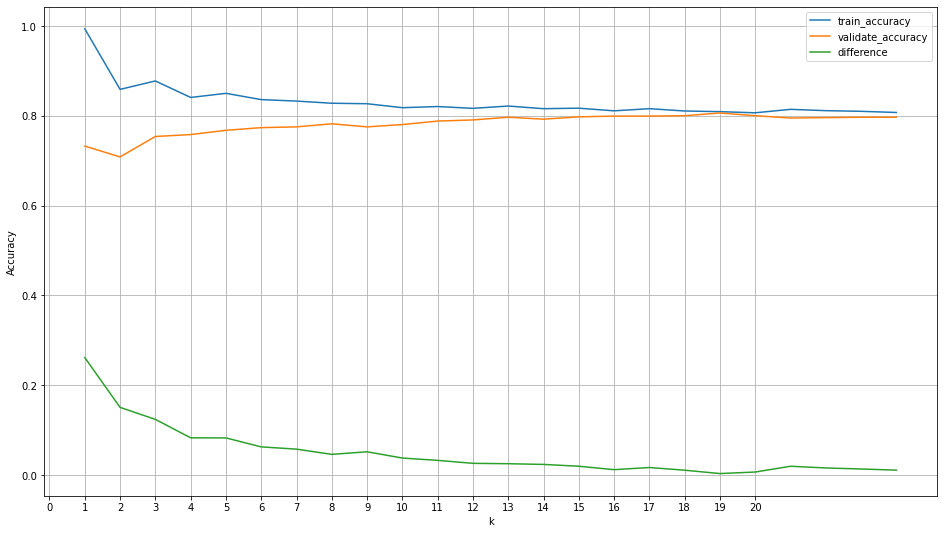

In [109]:
# plot the data
results.set_index('k').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

#### K-Nearest Neighbors Model Takeaways:
- Best KNN Model has an accuracy of 0.993 on the train data set but is very overfit comparing to 0.732 on the validate data set
- Choosing KNN Model with an accuracy of 0.809 on the train data set which is not overfit comparing to 0.806 on the validate data set using k = 19
- Both are higher than the baseline accuracy of 0.5

***
### Run Final Test on Best Model: K-Nearest Neighbors Model on Test Dataset
- Choosing KNN Model for the best model to use on test because of it's highest accuracy in both train and validate with the low overfitting. 
- It consistently returned high results and low differences between train and validate.

In [110]:
# Make the model
knn = KNeighborsClassifier(n_neighbors=19)

# Fit the model (on train and only train)
knn = knn.fit(X_train, y_train)

#Use the model to get accuracy on TEST dataset
print('Accuracy of KNN model on TEST set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of KNN model on TEST set: 0.79


### Best Model Final Run: K-Nearest Neighbors Model Takeaways:
- KNN Model has an accuracy of 79% using the test set
- This is HIGHER than the baseline accuracy of 50%

- Features used for this model include:
    - `'runs_scored', 'RBI', 'hits', 'HR','plate_app', 'doubles','bases_on_balls'`
    

- Our model has an accuracy of <code style="background:sky;color:black">79%</code> in predicting Major League Baseball wins which is a 29% improvement over the baseline of 50% accuracy. 
***

## Can we predict the score of a baseball game given hitting stats for a game?

Given what we know thus far, we will create a linear regression models to try and predict the number of runs scored in a game based on hitting statistics.

### Exploration of features in relation to predicting the final runs scored in a game

##### Questions to consider in determining how many runs were scored by a team in a baseball game:
   -  Are there certain features that are drivers of final score in a baseball game?
   -  Does the number of walks, hits, singles, doubles, and homeruns ultimately give the final score?
   -  Do popular baseball player statistics like OPS (On base + slugging percentages), OBP (on base percentage) and SLG (slugging percentage) lead to a good indication of the final score?

### Statistical Testing

### Question 1: Is the RBI of a game related to the final score in the game?

$H_0$ : There is no relationship between RBI and the final score for a team in a game.

$H_a$ : There is a relationship between RBI and the final score for a team in a game.

In [333]:
null_hyp1 = 'there is no relationship between RBI and the final score for a team in a game'

In [331]:
x = train.RBI
y = train.runs_scored

In [347]:
corr, p = stats.pearsonr(x, y)
corr, p

(0.9879059898251501, 0.0)

In [335]:
if p < alpha:
    print("We reject the hypothesis that", null_hyp1)
else:
    print("We fail to reject the null hypothesis")

We reject the hypothesis that there is no relationship between RBI and the final score for a team in a game


Text(8, 5, 'r = 0.988')

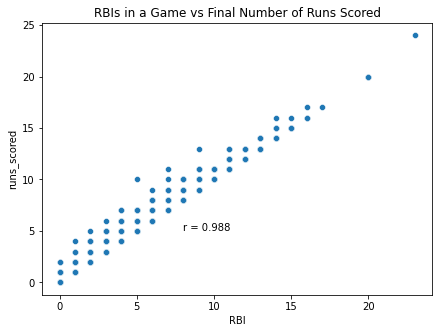

In [353]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 5))
ax = sns.scatterplot(x="RBI", y="runs_scored", data=train)
plt.title('RBIs in a Game vs Final Number of Runs Scored')
plt.text(8, 5, f'r = {corr:.3f}')

RBI and final number of runs scored in a game show a very linear relationship.  Will include in my model.

### Question 2: Is the average OPS of a team in a game related to the final score in the game?

$H_0$ : There is no relationship between the average OPS of a team and the final score for a team in a game.

$H_a$ : There is a relationship between the average OPS of a team and the final score for a team in a game.

In [358]:
null_hyp2 = 'there is no relationship between OPS and the final score for a team in a game'

In [354]:
x = train.OPS
y = train.runs_scored

In [366]:
corr, p = stats.spearmanr(x, y)
corr, p

(0.17218718224092266, 1.514831584535349e-19)

In [367]:
if p < alpha:
    print("We reject the hypothesis that", null_hyp2)
else:
    print("We fail to reject the null hypothesis")

We reject the hypothesis that there is no relationship between OPS and the final score for a team in a game


Text(0.5, 1.0, 'Avg OPS in a Game vs Final Number of Runs Scored')

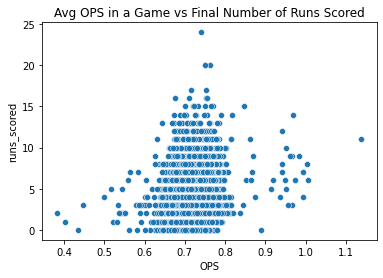

In [389]:
# Set up the matplotlib figure
ax = sns.scatterplot(x="OPS", y="runs_scored", data=train)
plt.title('Avg OPS in a Game vs Final Number of Runs Scored')

### Question 3: Is the average batting average of a team in a game related to the final score in the game?

$H_0$ : There is no relationship between the average batting average of a team in a game and the final score.

$H_a$ : There is a relationship between the average batting average of a team in a game and the final score.

In [380]:
null_hyp3 = 'there is no relationship between OPS and the final score for a team in a game'

In [381]:
x = train.batting_avg
y = train.runs_scored

In [382]:
corr, p = stats.spearmanr(x, y)
corr, p

(0.11307254671206349, 3.351073359011963e-09)

In [383]:
if p < alpha:
    print("We reject the hypothesis that", null_hyp3)
else:
    print("We fail to reject the null hypothesis")

We reject the hypothesis that there is no relationship between OPS and the final score for a team in a game


Text(0.5, 1.0, 'Batting Average in a Game vs Final Number of Runs Scored')

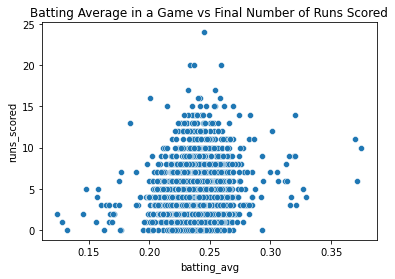

In [391]:
# Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(20, 10))
ax = sns.scatterplot(x="batting_avg", y="runs_scored", data=train)
plt.title('Batting Average in a Game vs Final Number of Runs Scored')
#plt.text(15, 10, f'r = {corr:.3f}')

### Takeaways:
   - The RBI of a game and the final number of runs scored in a game are related.
   - The average OPS, a popular batting statistic used to measure a baseball player's ability to get on base and hit, is related to the final number of runs scored in a game.  
   - The team's combined batting average for a game is related to the final number of runs scored in a game.
   
   - I will use all features in my model including, OBP (on base percentage) and SLG (slugging percentage) which are used to calculate OPS.  
       - Since OPS showed correlation, I will include those in my model as well.




### Modeling 

In [290]:
#In order to start modeling, we need to create out X and y for train, validate and test

#Set up x and y 
X_train = train[['RBI', 'OBP', 'SLG', 'OPS', 'batting_avg']]
X_validate = validate[['RBI','OBP', 'SLG', 'OPS','batting_avg']] 
X_test = test[['RBI', 'OBP', 'SLG', 'OPS','batting_avg']] 

#Scale the data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)

y_train = train.runs_scored
y_validate = validate.runs_scored
y_test = test.runs_scored

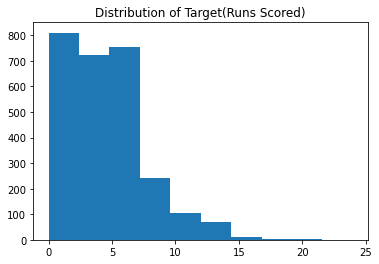

In [291]:
# Let's take a look at the target variable - final number of runs scored in a game by oe
plt.hist(y_train)
plt.title('Distribution of Target(Runs Scored)')
plt.show()

In [292]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test = pd.DataFrame(y_test)

### Recursive Feature Engineering
Recursive Feature Elimination

- Fits a model and eliminates the worst performing features
- Looks at all the features together

In [377]:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=1)
rfe.fit(X_train, y_train)
rfe.get_support()

array([False, False,  True, False, False])

In [378]:
X_train.columns[rfe.get_support()]

Index(['SLG'], dtype='object')

In [379]:
pd.Series(rfe.ranking_, index=X_train.columns)

RBI            4
OBP            2
SLG            1
OPS            3
batting_avg    5
dtype: int64

In [296]:
# SLG, OBP, and OPS were the top features identified with the recursive feature selection.

### Baseline for Regression Models

About the initial baseline:

- Before we begin making models, we need to know how well we can estimate (predict) the final error (logerror) without using any features. This is often done by predicting every observation's target value to be the mean or the median. E.g. we could predict every error to be the mean error of all the properties in our training sample. We will try both the mean and the median, see which performs best, and set that evaluation metric value as our baseline performance to beat.
- Predict all errors to be , which is equal to the mean of logerror for the training sample. Store in y_train['logerror_mean'].
- Predict all final errors to be , which is equal to the median of logerror for the training sample. Store in y_train['logerror_median'].
- Compute the RMSE comparing actual final error (logerror) to logerror_mean. Compute the RMSE comparing actual final error (logerror) to logerror_median.

In [297]:
# 1. Predict logerror_pred_mean
runs_pred_mean = y_train.runs_scored.mean()
y_train['runs_pred_mean'] = runs_pred_mean
y_validate['runs_pred_mean'] = runs_pred_mean

In [298]:
runs_pred_mean

4.489338235294118

In [299]:
# 2. compute logerror_pred_median
runs_pred_median = y_train.runs_scored.median()
y_train['runs_pred_median'] = runs_pred_median
y_validate['runs_pred_median'] = runs_pred_median

runs_pred_median

4.0

In [300]:
# 3. RMSE of logerror_pred_mean
rmse_train = mean_squared_error(y_train.runs_scored,
                                y_train.runs_pred_mean) ** .5
rmse_validate = mean_squared_error(y_validate.runs_scored, y_validate.runs_pred_mean) ** (1/2)

In [301]:
print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  3.13 
Validate/Out-of-Sample:  3.43


In [302]:
# 4. RMSE of logerror_pred_median
rmse_train = mean_squared_error(y_train.runs_scored, y_train.runs_pred_median) ** .5
rmse_validate = mean_squared_error(y_validate.runs_scored, y_validate.runs_pred_median) ** .5
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Median
Train/In-Sample:  3.17 
Validate/Out-of-Sample:  3.49


In [303]:
# create the metric_df as a blank dataframe
metric_df = pd.DataFrame()

# make our first entry into the metric_df with median baseline
metric_df = prepare.make_metric_df(y_train.runs_scored,
                           y_train.runs_pred_median,
                           'median_baseline',
                          metric_df)

In [304]:
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,3.168491,3.330669e-16


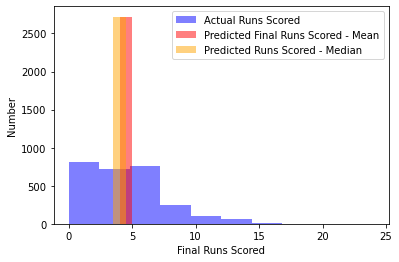

In [305]:

# plot to visualize actual vs predicted. 
plt.hist(y_train.runs_scored, color='blue', alpha=.5, label="Actual Runs Scored")
plt.hist(y_train.runs_pred_mean, bins=1, color='red', alpha=.5, rwidth=100, label="Predicted Final Runs Scored - Mean")
plt.hist(y_train.runs_pred_median, bins=1, color='orange', alpha=.5, rwidth=100, label="Predicted Runs Scored - Median")
plt.xlabel("Final Runs Scored")
plt.ylabel("Number")
plt.legend()
plt.show()

### Linear Regression (OLS)
1. Fit the model using X_train (scaled) and the labels from y_train.
2. Predict runs scored for games in training sample using our model (lm).
3. Evaluate using RMSE
4. Repeat predictions and evaluation for validation.

In [306]:
# create the model object
# 
# make the thing
# 
lm = LinearRegression(normalize=True)

In [307]:
# Fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series 
# 
# fit the thing
# 
lm.fit(X_train_scaled, y_train.runs_scored)

LinearRegression(normalize=True)

In [308]:
# Predict train
# 
# use the thing!
# 
y_train['runs_pred_lm'] = lm.predict(X_train_scaled)

In [309]:
# evaluate: rmse
rmse_train = mean_squared_error(y_train.runs_scored, y_train.runs_pred_lm) ** (1/2)

# predict validate
y_validate['runs_pred_lm'] = lm.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.runs_scored, y_validate.runs_pred_lm) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  0.48462550909692403 
Validation/Out-of-Sample:  0.5083136996204998


In [310]:
metric_df = metric_df.append({
    'model': 'OLS Regressor', 
    'RMSE_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.runs_scored, y_validate.runs_pred_lm)}, ignore_index=True)

In [311]:
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,3.168491,3.330669e-16
1,OLS Regressor,0.508314,9.779541e-01


### LassoLars
1. Fit the model using X_train_scaled and the labels from y_train.
2. Predict final runs scored in training sample using our model (lars).
3. Evaluate using RMSE
4. Repeat predictions and evaluation for validation.

In [312]:
# create the model object
lars = LassoLars(alpha=1)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series!
lars.fit(X_train_scaled, y_train.runs_scored)

# predict train
y_train['runs_pred_lars'] = lars.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.runs_scored, y_train.runs_pred_lars) ** (1/2)

# predict validate
y_validate['runs_pred_lars'] = lars.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.runs_scored, y_validate.runs_pred_lars) ** (1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  3.130477012656914 
Validation/Out-of-Sample:  3.428007424461649


In [313]:
metric_df = prepare.make_metric_df(y_validate.runs_scored,
               y_validate.runs_pred_lars,
               'lasso_alpha_1',
               metric_df)

In [314]:
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,3.168491,3.330669e-16
1,OLS Regressor,0.508314,9.779541e-01
2,lasso_alpha_1,3.428007,0.000000e+00


### TweedieRegressor (GLM)
1. Fit the model using X_train_scaled and the labels from y_train.
2. Predict runs scored for games in training sample using our model (glm).
3. Evaluate using RMSE
4. Repeat predictions and evaluation for validation.
5. Compare RMSE train vs. validation. 

In [315]:
# create the model object
lars = LassoLars(alpha=4)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series!
lars.fit(X_train, y_train.runs_scored)

# predict train
y_train['runs_pred_lars'] = lars.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.runs_scored, y_train.runs_pred_lars) ** (1/2)

# predict validate
y_validate['runs_pred_lars'] = lars.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.runs_scored, y_validate.runs_pred_lars) ** (1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  3.130477012656914 
Validation/Out-of-Sample:  3.428007424461649


In [316]:
metric_df = prepare.make_metric_df(y_validate.runs_scored,
               y_validate.runs_pred_lars,
               'lasso_alpha_4',
               metric_df)
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,3.168491,3.330669e-16
1,OLS Regressor,0.508314,9.779541e-01
2,lasso_alpha_1,3.428007,0.000000e+00
3,lasso_alpha_4,3.428007,0.000000e+00


### Polynomial Regression
Using sklearn.preprocessing.PolynommialFeatures() + sklearn.linear_model.LinearRegression()
1. Create the new features, based on value indicated for degree for train, validate & test.
2. Fit the Linear Regression model
3. Predict using the transformed (squared or cubed, e.g.) features
4. Evaluate using RMSE
5. Repeat predictions and evaluation for validation.
6. Compare RMSE train vs. validation. Overfitting?


#### Polynomial Features

In [317]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train_scaled)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate_scaled)
X_test_degree2 =  pf.transform(X_test_scaled)

#### Linear Regression

In [318]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.runs_scored)

# predict train
y_train['runs_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.runs_scored, y_train.runs_pred_lm2) ** (1/2)

# predict validate
y_validate['runs_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.runs_scored, y_validate.runs_pred_lm2) ** 0.5

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  0.48232603326902523 
Validation/Out-of-Sample:  0.5128354890533349


In [319]:
metric_df = prepare.make_metric_df(y_validate.runs_scored,
               y_validate.runs_pred_lm2,
               'quadratic',
               metric_df)
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,3.168491,3.330669e-16
1,OLS Regressor,0.508314,9.779541e-01
2,lasso_alpha_1,3.428007,0.000000e+00
3,lasso_alpha_4,3.428007,0.000000e+00
4,quadratic,0.512835,9.775605e-01


#### Trying the same model with a degree of 3 to compare performance

In [320]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=3)

# fit and transform X_train_scaled
X_train_degree3 = pf.fit_transform(X_train_scaled)

# transform X_validate_scaled & X_test_scaled
X_validate_degree3 = pf.transform(X_validate_scaled)
X_test_degree3 =  pf.transform(X_test_scaled)

In [321]:
# create the model object
lm3 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm3.fit(X_train_degree3, y_train.runs_scored)

# predict train
y_train['runs_pred_lm3'] = lm3.predict(X_train_degree3)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.runs_scored, y_train.runs_pred_lm3) ** (1/2)

# predict validate
y_validate['runs_pred_lm3'] = lm3.predict(X_validate_degree3)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.runs_scored, y_validate.runs_pred_lm3) ** 0.5

print("RMSE for Polynomial Model, degrees=3\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=3
Training/In-Sample:  0.4792717726605364 
Validation/Out-of-Sample:  0.5497768232784164


In [322]:
metric_df = prepare.make_metric_df(y_validate.runs_scored,
               y_validate.runs_pred_lm3,
               '3degree_quadratic',
               metric_df)
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,3.168491,3.330669e-16
1,OLS Regressor,0.508314,9.779541e-01
2,lasso_alpha_1,3.428007,0.000000e+00
3,lasso_alpha_4,3.428007,0.000000e+00
4,quadratic,0.512835,9.775605e-01
5,3degree_quadratic,0.549777,9.742172e-01


In [323]:
metric_df.style.format(
                formatter={('RMSE_validate', 'r^2_validate'): "{:.5f}",
                          })

,model,RMSE_validate,r^2_validate
0,median_baseline,3.168491,0.000000
1,OLS Regressor,0.508314,0.977954
2,lasso_alpha_1,3.428007,0.000000
3,lasso_alpha_4,3.428007,0.000000
4,quadratic,0.512835,0.977560
5,3degree_quadratic,0.549777,0.974217


### Comparing Models Visually
Plotting actual vs predicted values

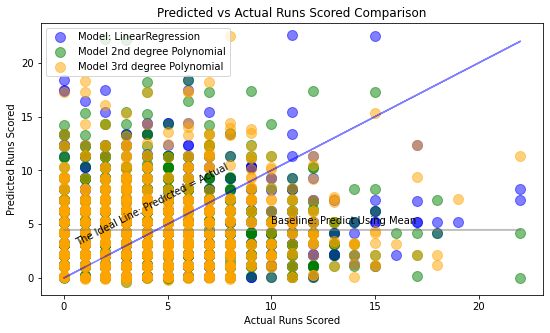

In [324]:
# y_validate.head()
plt.figure(figsize=(9,5))
plt.plot(y_validate.runs_scored, y_validate.runs_pred_mean, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (10, 5))
plt.plot(y_validate.runs_scored, y_validate.runs_scored, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3), rotation=27)

plt.scatter(y_validate.runs_scored.sample(n=1000), y_validate.runs_pred_lm.sample(n=1000), 
            alpha=.5, color="blue", s=100, label="Model: LinearRegression")
#plt.scatter(y_validate.logerror.sample(n=1000), y_validate.logerror_pred_glm.sample(n=1000), 
            #alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.runs_scored.sample(n=1000), y_validate.runs_pred_lm2.sample(n=1000), 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.scatter(y_validate.runs_scored.sample(n=1000), y_validate.runs_pred_lm3.sample(n=1000), 
            alpha=.5, color="orange", s=100, label="Model 3rd degree Polynomial")
plt.legend()
plt.xlabel("Actual Runs Scored")
plt.ylabel("Predicted Runs Scored")
plt.title("Predicted vs Actual Runs Scored Comparison")
plt.show()

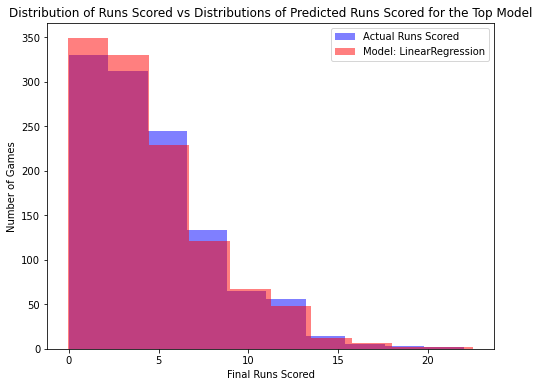

In [325]:
# plot tgo visualize actual vs predicted. 
plt.figure(figsize=(8,6))
plt.hist(y_validate.runs_scored, color='blue', alpha=.5, label="Actual Runs Scored")
plt.hist(y_validate.runs_pred_lm, color='red', alpha=.5, label="Model: LinearRegression")
#plt.hist(y_validate.runs_pred_glm, color='yellow', alpha=.5, label="Model: TweedieRegressor")
#plt.hist(y_validate.runs_pred_lm2, color='green', alpha=.5, label="Model 2nd degree Polynomial")
#plt.hist(y_validate.runs_pred_lm3, color='orange', alpha=.5, label="Model 3rd degree Polynomial")
plt.xlabel("Final Runs Scored")
plt.ylabel("Number of Games")
plt.title("Distribution of Runs Scored vs Distributions of Predicted Runs Scored for the Top Model")
plt.legend()
plt.show()

### After running different models, choosing OLS Regressor as the best model to use on test.

### Modeling Takeaways:
Linear Regression Model performed better than the baseline by having the lowest RMSE and a R^2 of 0.985745. 
***

## Running the Best Model on Test Sample
### Model Selection & Out-of-Sample Evaluation
Model selected: LinearRegression

In [326]:
y_test = pd.DataFrame(y_test)

# predict test
y_test['runs_pred_lm'] = lm.predict(X_test_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.runs_scored, y_train.runs_pred_lm) ** (1/2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.runs_scored, y_validate.runs_pred_lm) ** (1/2)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.runs_scored, y_test.runs_pred_lm) ** 0.5


print("RMSE for OLS using Linear Regression Model\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate,
     "\nTest/Out-of-Sample: ", rmse_test)

RMSE for OLS using Linear Regression Model
Training/In-Sample:  0.48462550909692403 
Validation/Out-of-Sample:  0.5083136996204998 
Test/Out-of-Sample:  0.49013817360206463


In [327]:
metric_df = prepare.make_metric_df(y_test.runs_scored,
               y_test.runs_pred_lm,
               'TEST_OLS',
               metric_df)

In [328]:
metric_df.style.format(
                formatter={('RMSE_validate', 'r^2_validate'): "{:.2f}",
                          })

,model,RMSE_validate,r^2_validate
0,median_baseline,3.168491,0.000000
1,OLS Regressor,0.508314,0.977954
2,lasso_alpha_1,3.428007,0.000000
3,lasso_alpha_4,3.428007,0.000000
4,quadratic,0.512835,0.977560
5,3degree_quadratic,0.549777,0.974217
6,TEST_OLS,0.490138,0.973801


### Best Model Final Run Takeaways

- Our model performed really well with an explained variance score of 97% and a low RMSE of 0.49.
- The Linear Regression Model was chosen for the final run on out of sample data. 


- Our model can predict the number of runs scored by a Major League Baseball team in a baseball game with very low error.